In [34]:
import pandas as pd

# Ruta del primer archivo CSV
file_path1 = 'dailyActivity3-4.csv'

# Ruta del segundo archivo CSV
file_path2 = 'dailyActivity4-5.csv'

# Cargar el primer archivo CSV en un DataFrame
df1 = pd.read_csv(file_path1)

# Cargar el segundo archivo CSV en otro DataFrame
df2 = pd.read_csv(file_path2)

# Concatenar df2 al final de df1
df = pd.concat([df1, df2], ignore_index=True)

# Seleccionar todas las columnas excepto 'TrackerDistance', 'Date' y 'LoggedActivitiesDistance'
df = df.drop(columns=['TrackerDistance', 'LoggedActivitiesDistance', 'ActivityDate'])

# Obtener los nombres de las columnas como un array
column_names = df.columns.to_list()

# Imprimir el array de nombres de columnas
print(column_names)

['Id', 'TotalSteps', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']


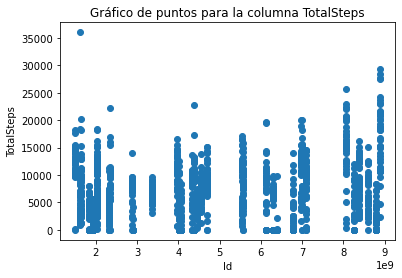

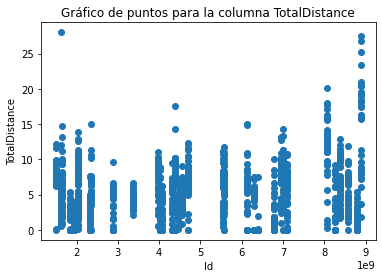

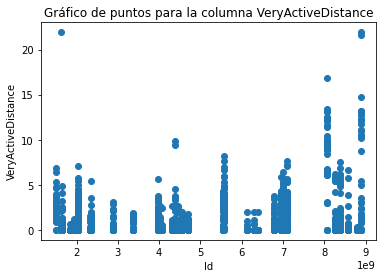

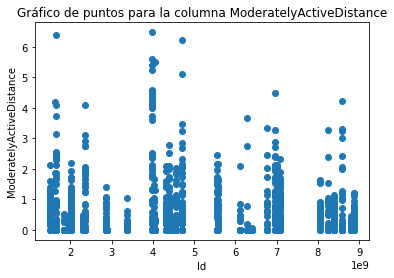

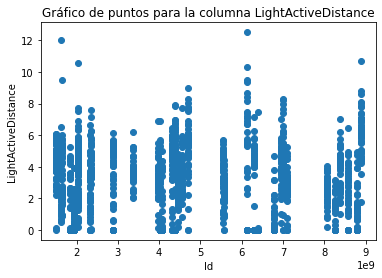

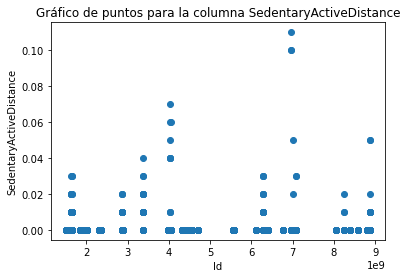

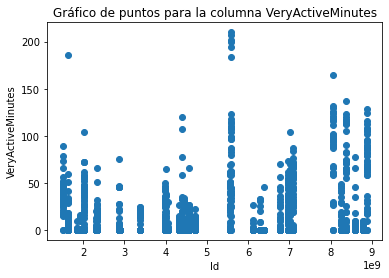

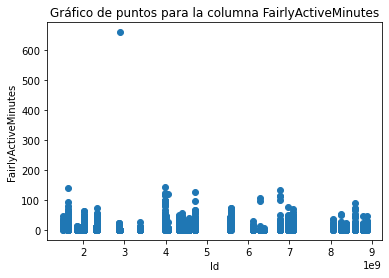

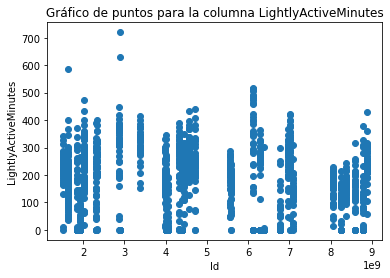

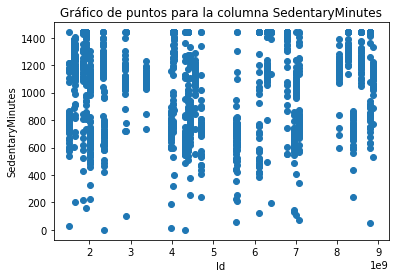

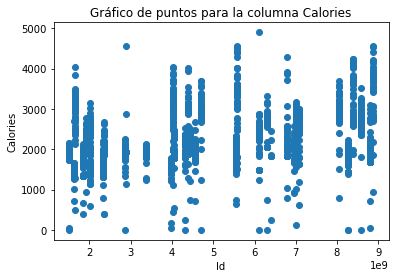

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre cada columna y generar un gráfico de puntos
for column in df.columns:
    if column != 'Id': # Excluir la columna 'Id'
        plt.figure() # Crear una nueva figura para cada gráfico
        plt.scatter(df['Id'], df[column]) # Dibujar el gráfico de puntos
        plt.title(f'Gráfico de puntos para la columna {column}') # Título del gráfico
        plt.xlabel('Id') # Etiqueta del eje x
        plt.ylabel(column) # Etiqueta del eje y
        plt.show() # Mostrar el gráfico

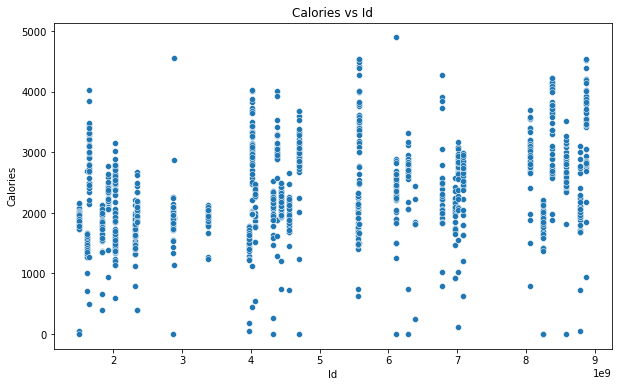

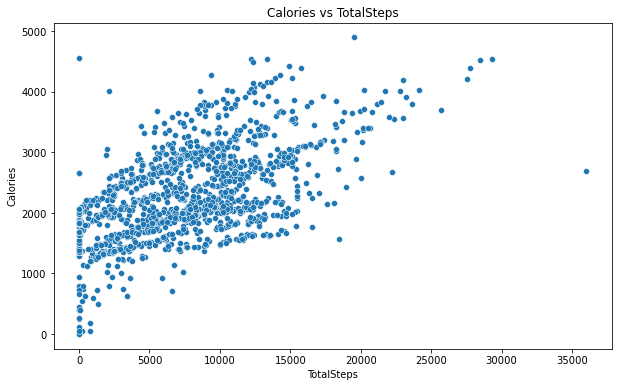

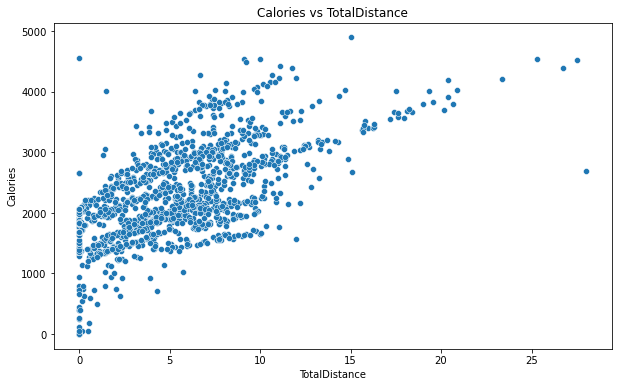

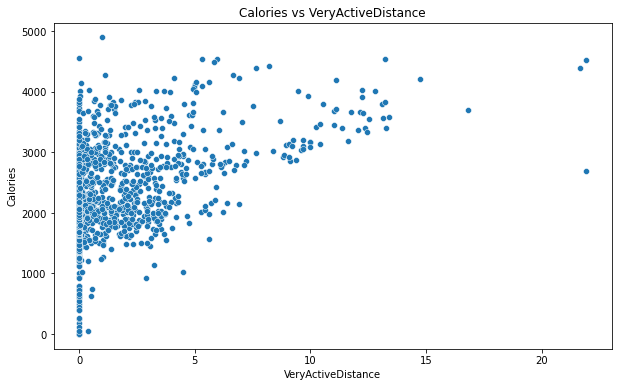

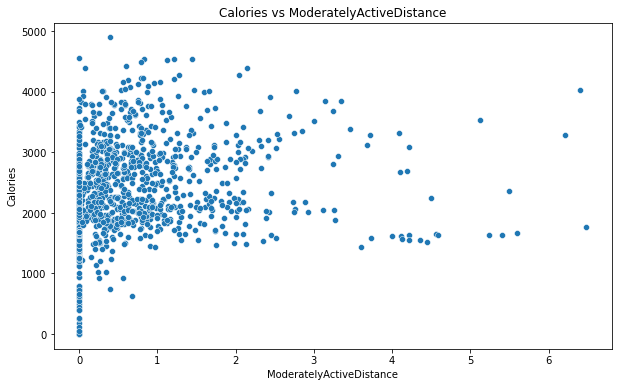

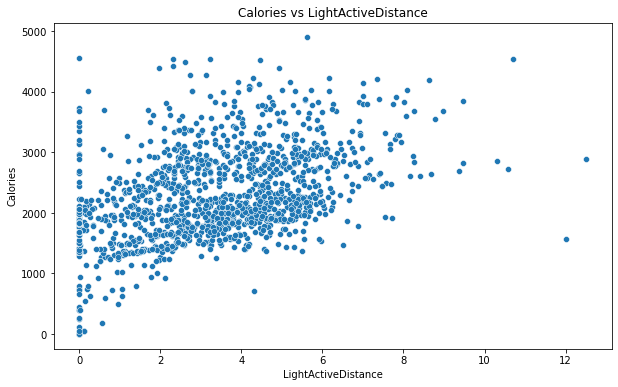

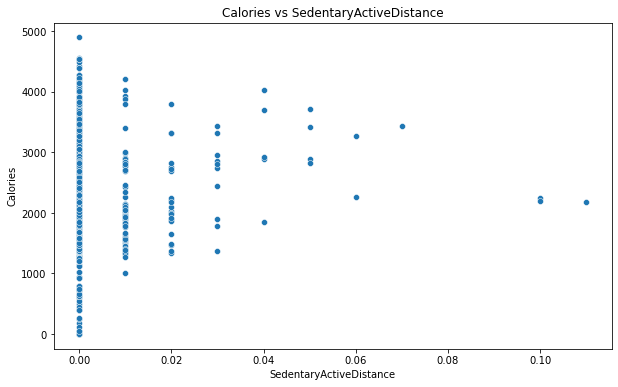

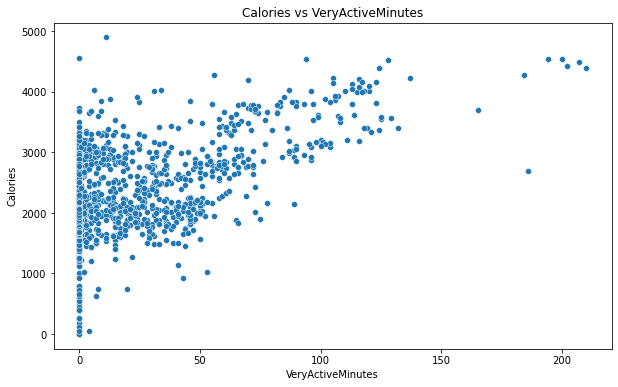

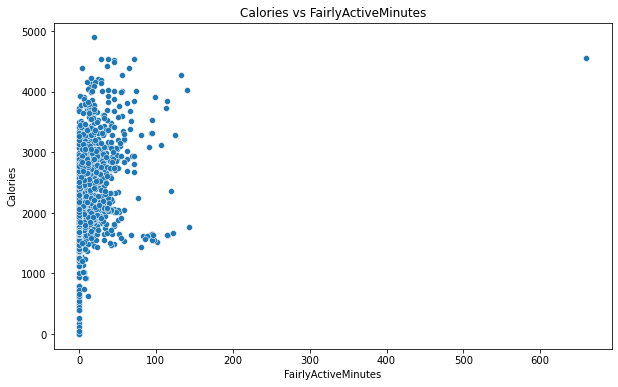

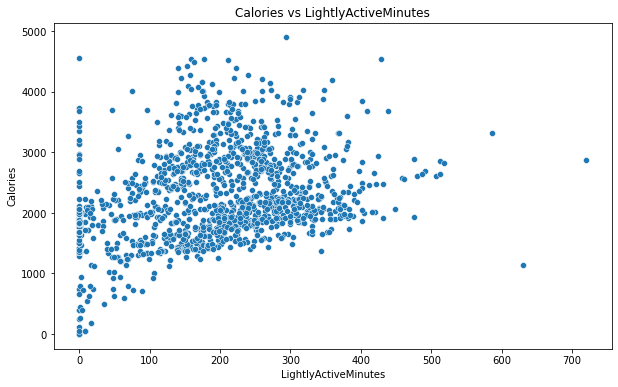

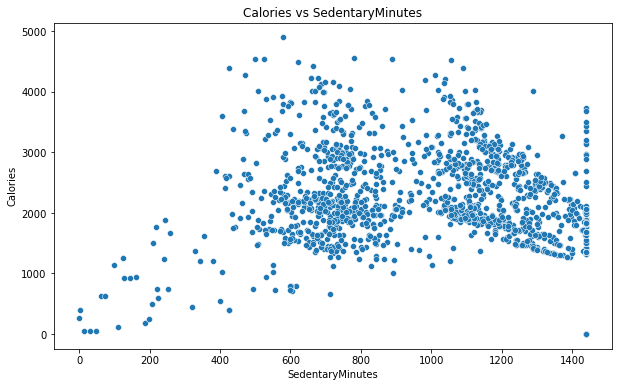

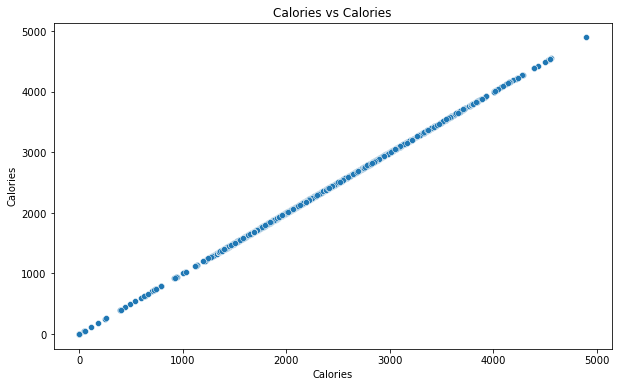

In [36]:
import seaborn as sns

# Identificar las columnas que terminan en "Minutes"
minutes_columns = [col for col in df.columns if col.endswith('Minutes')]

# Iterar sobre las columnas identificadas y generar un gráfico de puntos
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=f'{column}', y='Calories', data=df)
    plt.title(f'Calories vs {column}')
    plt.show()

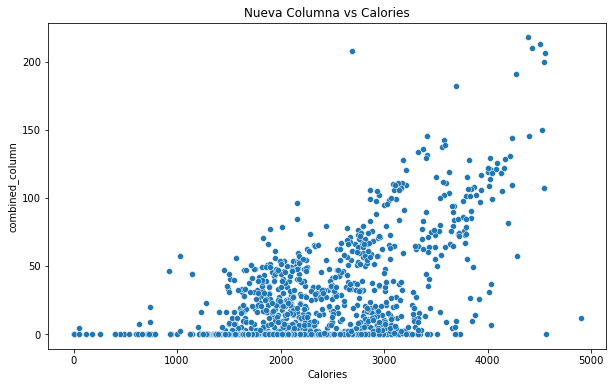

In [37]:
# Combinar column1 y column2 en una nueva columna
df['combined_column'] = df['VeryActiveMinutes'] + df['VeryActiveDistance']

# Trazar combined_column con other_column
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Calories', y='combined_column', data=df)
plt.title('Nueva Columna vs Calories')
plt.show()

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'Date' es el nombre de la columna de fecha
df1 = df.drop(columns=['ActivityDate'])

correlation_matrix = df1.corr()
print(correlation_matrix)

fig, ax = plt.subplots(figsize=(12, 7)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

KeyError: "['ActivityDate'] not found in axis"

In [ ]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1) # Variables independientes
y = df['Calories'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

# Suponiendo que df es tu DataFrame
X = df.loc[:, ['TotalSteps', 'TotalDistance', 'VeryActiveDistance', 'VeryActiveMinutes']]
y = df['Calories'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     547.3
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          6.65e-261
Time:                        10:15:55   Log-Likelihood:                -8379.2
No. Observations:                1117   AIC:                         1.677e+04
Df Residuals:                    1112   BIC:                         1.679e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1649.1368     24

In [ ]:
# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 191742.78577367024
Coeficiente de Determinación R^2: 0.6534048210370607


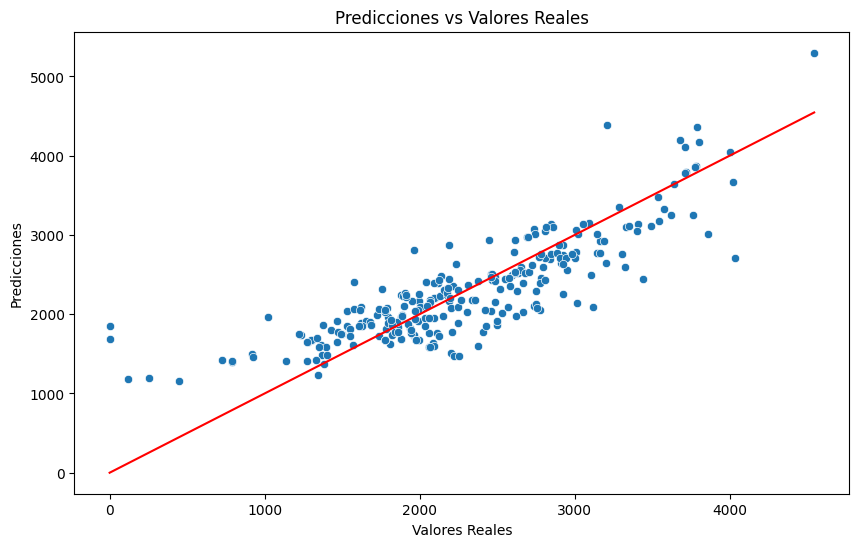

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

In [ ]:
residuos = model.resid

In [ ]:
import numpy as np

media_residuos = np.mean(residuos)
suma_residuos = np.sum(residuos)

print(f"Media de los residuos: {media_residuos}")

if np.isclose(media_residuos, 0):
    print("La media de los residuos es cero.")
else:
    print("La media de los residuos no es cero.")

print(f"Suma de los residuos: {suma_residuos}")

if np.isclose(suma_residuos, 0):
    print("La suma de los residuos es cero.")
else:
    print("La suma de los residuos no es cero.")


Media de los residuos: 4.290991117585794e-13
La media de los residuos es cero.
Suma de los residuos: 4.793037078343332e-10
La suma de los residuos es cero.


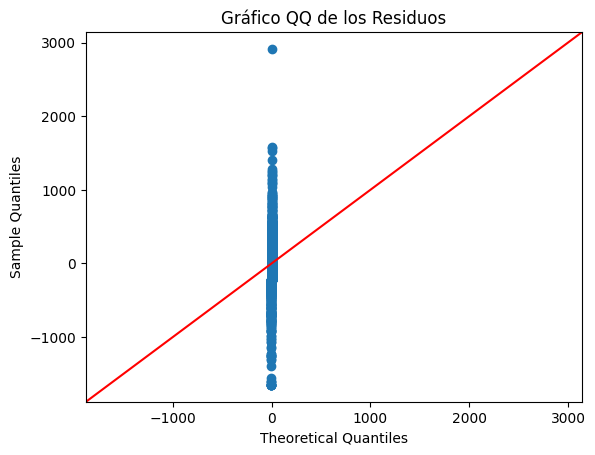

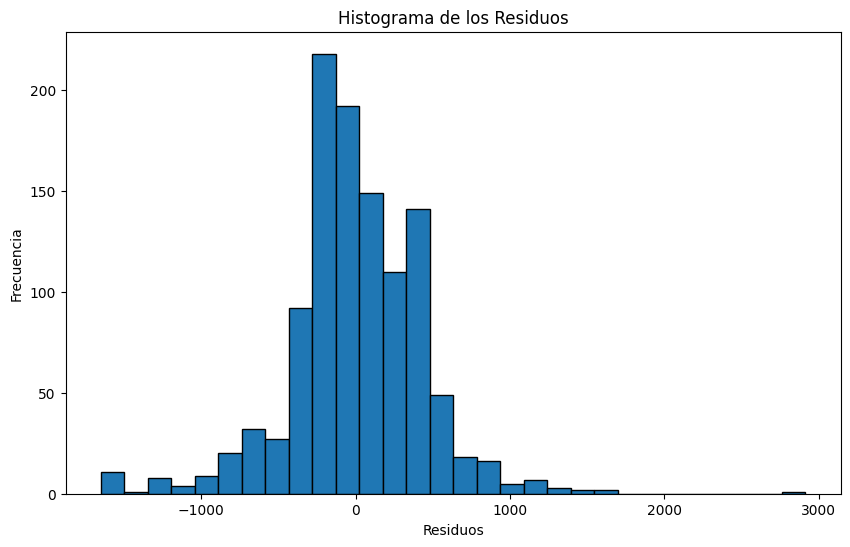

D = 0.5301908421786043, p-value = 1.6746453156995563e-293
Los residuos no parecen estar normalmente distribuidos.


In [ ]:
from scipy.stats import kstest

# Gráfico QQ de los residuos
fig = sm.qqplot(residuos, line='45')
plt.title('Gráfico QQ de los Residuos')
plt.show()

# Histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# Realizar la prueba del Kolmogorov-Smirnov para verificar la normalidad de los residuos
D, p_value = kstest(residuos, 'norm')

print(f"D = {D}, p-value = {p_value}")

if p_value > 0.05:
    print("Los residuos parecen estar normalmente distribuidos.")
else:
    print("Los residuos no parecen estar normalmente distribuidos.")

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Realizar el test de Durbin-Watson
dw_stat = durbin_watson(model.resid)

print(f"Estadística de Durbin-Watson: {dw_stat}")

# Interpretación de la estadística de Durbin-Watson
if 1.5 < dw_stat < 2.5:
    print("No hay autocorrelación en los residuos.")
elif dw_stat < 1.5:
    print("Hay autocorrelación positiva en los residuos.")
else:
    print("Hay autocorrelación negativa en los residuos.")

Estadística de Durbin-Watson: 2.0490715971475475
No hay autocorrelación en los residuos.


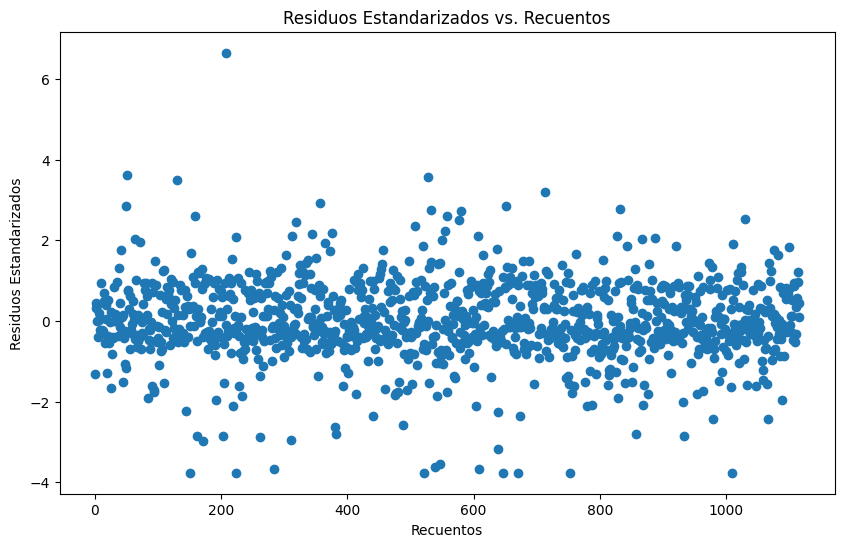

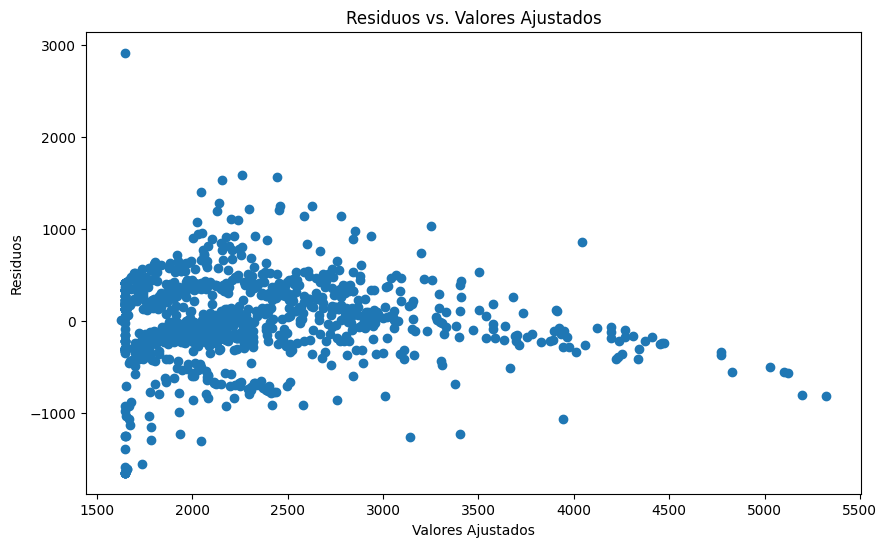

[('Lagrange multiplier statistic', 22.895773518958887), ('p-value', 0.00013284388858730904), ('f-value', 5.8175673616967485), ('f p-value', 0.00012370140888816726)]


In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Calcular los residuos estandarizados
residuos_estandarizados = residuos / np.std(residuos)

# Gráfico de residuos estandarizados contra recuentos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuos_estandarizados)), residuos_estandarizados)
plt.title('Residuos Estandarizados vs. Recuentos')
plt.xlabel('Recuentos')
plt.ylabel('Residuos Estandarizados')
plt.show()

# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuos)
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()


# Realizar el test de Breusch-Pagan
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

# Imprimir los resultados del test
print(lzip(names, test))

In [ ]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1) # Variables independientes
y = df['Calories'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Prediccion por arboles de decision

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Crear y entrenar el modelo
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Para predecir Calories
predicted_calories = model.predict(X_test)

Precisión: 0.08928571428571429


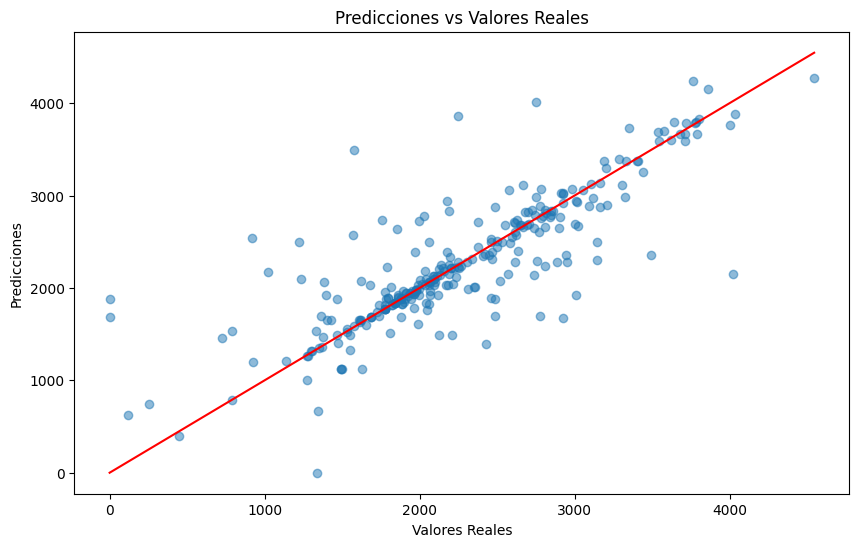

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_calories, alpha=0.5)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r-')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

In [ ]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

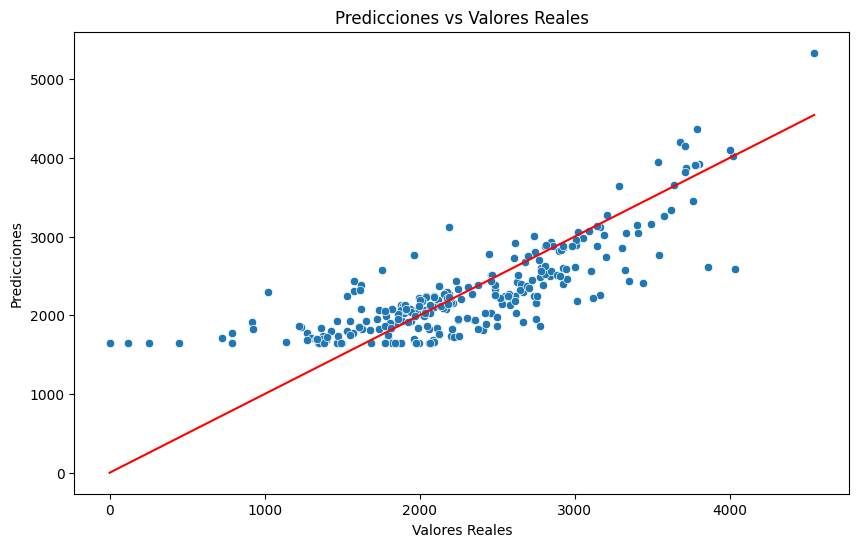

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1) # Variables independientes
y = df['Calories'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1) # Variables independientes
y = df['Calories'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Para predecir
predicted_labels = model.predict(X_test)

Precisión: 0.08928571428571429


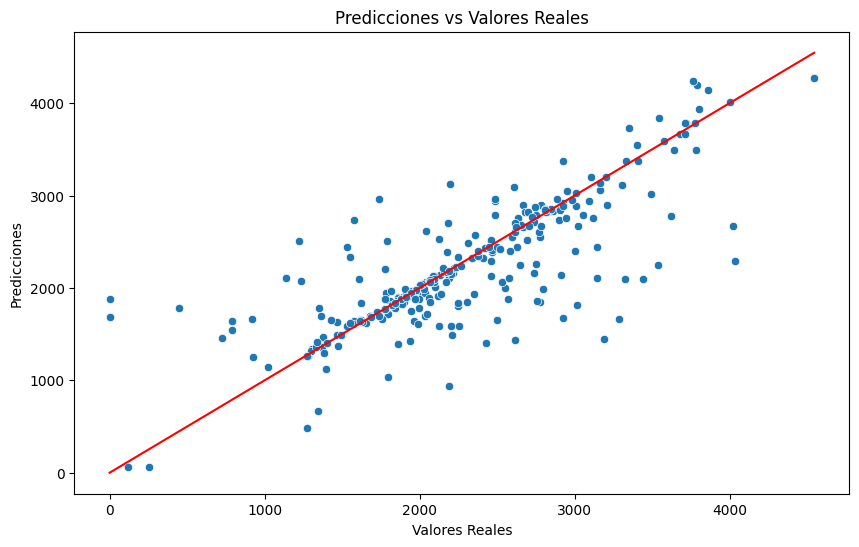

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predicted_labels})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

from sklearn.metrics import accuracy_score

# Suponiendo que predicted_labels son las predicciones de tu modelo
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Precisión: {accuracy}")

# Mostrar el gráfico
plt.show()

In [ ]:
from scipy import stats
import statsmodels.stats.multicomp as multi

# Suponiendo que df es tu DataFrame y que las columnas son 'medida1', 'medida2', 'medida3', 'medida4'
# df = pd.read_csv('tu_archivo.csv')

# Extraer las columnas de interés
medida1 = df['ModeratelyActiveDistance']
medida2 = df['LightActiveDistance']
medida3 = df['SedentaryActiveDistance']
medida4 = df['VeryActiveDistance']



# Asegúrate de que no haya valores faltantes en las columnas de interés
dfAnova = df.dropna(subset=['SedentaryActiveDistance', 'ModeratelyActiveDistance', 'VeryActiveDistance', 'LightActiveDistance'])

medida1 = dfAnova['SedentaryActiveDistance']
medida2 = dfAnova['ModeratelyActiveDistance']
medida3 = dfAnova['VeryActiveDistance']
medida4 = dfAnova['LightActiveDistance']

# Realizar el ANOVA
f_val, p_val = stats.f_oneway(medida1, medida2, medida3, medida4)

print("F-valor:", f_val)
print("P-valor:", p_val)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realiza la prueba post-hoc de Tukey
# tukey_results = pairwise_tukeyhsd(endog=dfAnova['SedentaryActiveDistance'], groups=dfAnova['Calories'], alpha=0.05)

# Muestra los resultados
# print(tukey_results)

F-valor: 906.9535694669063
P-valor: 0.0


In [ ]:
from scipy import stats
import statsmodels.stats.multicomp as multi

# Suponiendo que df es tu DataFrame y que las columnas son 'medida1', 'medida2', 'medida3', 'medida4'
# df = pd.read_csv('tu_archivo.csv')

# Extraer las columnas de interés
medida1 = df['ModeratelyActiveDistance']
medida2 = df['LightActiveDistance']
medida3 = df['SedentaryActiveDistance']
medida4 = df['VeryActiveDistance']

# Realizar el ANOVA
f_val, p_val = stats.f_oneway(medida1, medida2, medida3, medida4)

print("F-valor:", f_val)
print("P-valor:", p_val)

data_transposed = df.T

# Realizar el test de Tukey
mc = multi.MultiComparison(data_transposed.values, data_transposed.index)
result = mc.tukeyhsd()

print(result, data_transposed)

F-valor: 906.9535694669061
P-valor: 0.0
                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                   group2             meandiff   p-adj lower upper reject
----------------------------------------------------------------------------------------
                Calories      FairlyActiveMinutes          0.46   nan   nan   nan  False
                Calories                       Id          4.07   nan   nan   nan  False
                Calories      LightActiveDistance          2.57   nan   nan   nan  False
                Calories     LightlyActiveMinutes          7.11   nan   nan   nan  False
                Calories ModeratelyActiveDistance          12.0   nan   nan   nan  False
                Calories  SedentaryActiveDistance          33.0   nan   nan   nan  False
                Calories         SedentaryMinutes         205.0   nan   nan   nan  False
                Calories            TotalDistance         804.0   nan 

c:\Users\AlfreditoPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\AlfreditoPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy import stats
import numpy as np

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1) # Variables independientes
y = df['Calories'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Definir el modelo
model = RandomForestRegressor()

# Lista para almacenar las métricas de rendimiento de cada iteración
performance_metrics = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Asegurarse de que cada subconjunto tenga al menos dos observaciones
    if len(X_train_fold) < 2 or len(X_val_fold) < 2:
        print("Error: Uno de los subconjuntos tiene menos de dos observaciones.")
        continue
    
    # Entrenar el modelo con el conjunto de entrenamiento actual
    model.fit(X_train_fold, y_train_fold)
    
    # Validar el modelo con el conjunto de validación actual
    y_pred = model.predict(X_val_fold)
    
    # Calcular el error cuadrático medio (MSE)
    mse = mean_squared_error(y_val_fold, y_pred)
    
    # Almacenar el MSE en la lista de métricas de rendimiento
    performance_metrics.append(mse)

# Asegurarse de que la lista de métricas de rendimiento no esté vacía
if not performance_metrics:
    print("Error: No se han calculado métricas de rendimiento.")
else:
    # Convertir la lista de métricas de rendimiento en un array de numpy para aplicar ANOVA
    performance_metrics_array = np.array(performance_metrics)
    
    # Aplicar ANOVA
    f_valor, p_valor = stats.f_oneway(*[performance_metrics_array for _ in range(k)])
    
    print("F-valor:", f_valor)
    print("P-valor:", p_valor)
    
    # Interpreta los resultados
    if p_valor < 0.05:
        print("Rechazamos la hipótesis nula. Las medias de las métricas de rendimiento no son iguales.")
    else:
        print("No rechazamos la hipótesis nula. Las medias de las métricas de rendimiento pueden ser iguales.")

F-valor: 3.805886716818853e-33
P-valor: 1.0
No rechazamos la hipótesis nula. Las medias de las métricas de rendimiento pueden ser iguales.


In [ ]:
import pandas as pd

# contruyamos una categoria
min_value = df['TotalSteps'].min()
max_value = df['TotalSteps'].max()
range_size = (max_value - min_value) / 5

# Definir los intervalos y los nombres de las categorías
bins = [min_value, min_value + range_size, min_value + 2*range_size, min_value + 3*range_size, min_value + 4*range_size, max_value]
labels = ['trainer', 'yunior', 'middle', 'athlean', 'pro']

# Crear la nueva columna 'TotalstepsCat'
df['TotalStepsCat'] = pd.cut(df['TotalSteps'], bins=bins, labels=labels)

In [ ]:
# hagamos 5 conjuntos
step1 = []
step2 = []
step3 = []
step4 = []
step5 = []


for i in range(0, 1200) : 
    if (df['TotalStepsCat'] == 'trainer')[i]:
        step1.append(float(df['TotalSteps'][i]))
    elif (df['TotalStepsCat'] == 'yunior')[i]:
        step2.append(float(df['TotalSteps'][i]))
    elif (df['TotalStepsCat'] == 'middle')[i]:
        step3.append(float(df['TotalSteps'][i]))
    elif (df['TotalStepsCat'] == 'athlean')[i]:
        step4.append(float(df['TotalSteps'][i]))
    elif (df['TotalStepsCat'] == 'pro')[i]:
        step5.append(float(df['TotalSteps'][i]))


from scipy.stats import f_oneway

 
# Realiza la prueba ANOVA
f_stat, p_value = f_oneway(step1, step2, step4, step4, step5)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")


modelo = ols('TotalSteps ~ C(TotalStepsCat)', data=data).fit()
anova_results = sm.stats.anova_lm(modelo, typ=1)

F-Statistic: 925.9394767762527, P-Value: 0.0


NameError: name 'ols' is not defined

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realiza la prueba post-hoc de Tukey
tukey_results = pairwise_tukeyhsd(endog=df['TotalSteps'], groups=df['TotalStepsCat'], alpha=0.05)

# Muestra los resultados
print(tukey_results) 

TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
# Poblaciones normales
from scipy import stats

stat, p = stats.shapiro(step1)

print('Group1 - Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p < 0.05:
    print("There is evidence to reject the null hypothesis that the values follow a normal distribution.")
else:
    print("There is not enough evidence to reject the null hypothesis that the values follow a normal distribution.")


Group1 - Shapiro-Wilk Test: Statistics=0.954, p=0.000
There is evidence to reject the null hypothesis that the values follow a normal distribution.


In [ ]:
# Test de Levene
stat, p = stats.levene(step1, step2, step3, step4, step5)
print('Levene Test: Statistics=%.3f, p=%.3f' % (stat, p))

#test de breusch-pagan
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan

# Extrae los residuos y las variables independientes (predictores) ajustadas
residuos = modelo.resid
variables_independientes = modelo.model.exog

# Realiza el test de Breusch-Pagan
bp_test = het_breuschpagan(residuos, variables_independientes)

print(f'Valor de estadístico de Lagrange: {bp_test[0]}')
print(f'p-valor del test: {bp_test[1]}')
print(f'Valor del estadístico F: {bp_test[2]}')
print(f'p-valor del test F: {bp_test[3]}')


Levene Test: Statistics=4.566, p=0.001


In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Calcula el estadístico de Durbin-Watson
dw = durbin_watson(modelo.resid)

print(f"Estadístico de Durbin-Watson: {dw}")

alpha =0.5

if 2 - alpha <= dw <= 2 + alpha:
    print("The residuals are uncorrelated.")
elif dw > 2 + 0.5:
    print("There is a positive autocorrelation.")
else:
    print("There is a negative autocorrelation.")